In [35]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import os
for dirname, _, filenames in os.walk('Cleaned-Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv ('covid19.csv')
df2 = pd.read_csv ('Raw-Data.csv')
df3 = pd.read_csv ('Cleaned-Data.csv')
df3


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [24]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

<Axes: >

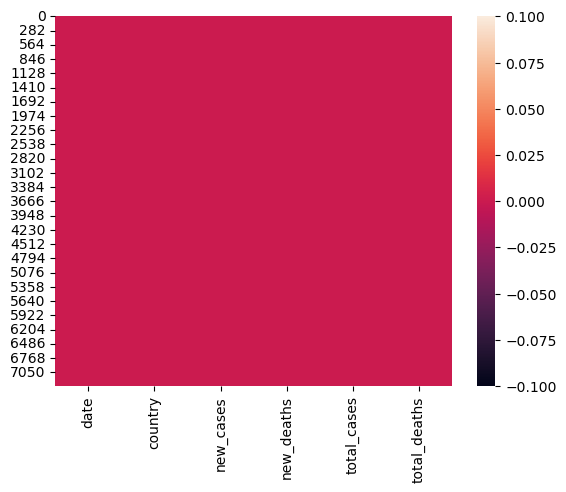

In [25]:
sns.heatmap(df.isnull())

<Axes: >

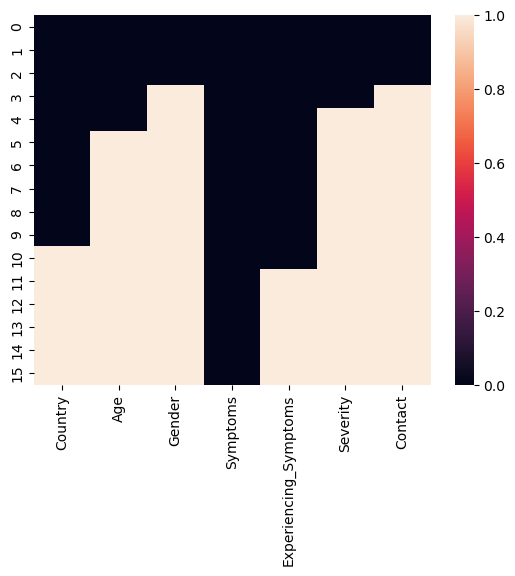

In [27]:
sns.heatmap(df2.isnull())

<Axes: >

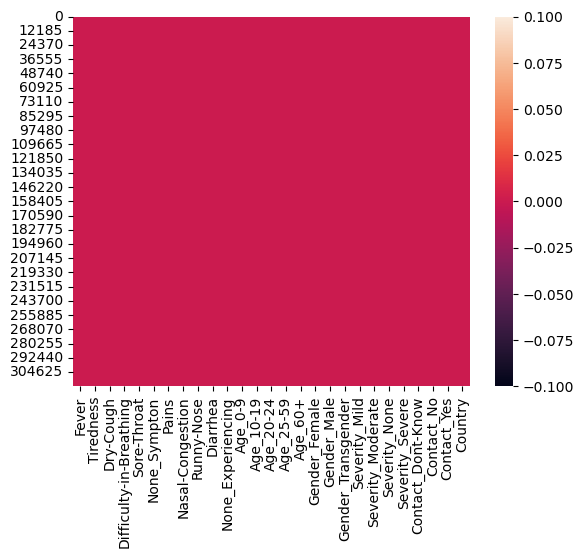

In [28]:
sns.heatmap(df3.isnull())

In [39]:
null = df.isnull().sum()

In [37]:
GaussianNB()

GaussianNB()

In [40]:
df3.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [41]:
df3.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis = 1, inplace = True)
df3

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,1
316796,0,0,0,0,0,0,0,0,0,1,1
316797,0,0,0,0,0,0,0,0,0,1,0
316798,0,0,0,0,0,0,0,0,0,1,0


array([[<Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>],
       [<Axes: title={'center': 'Difficulty-in-Breathing'}>,
        <Axes: title={'center': 'Sore-Throat'}>,
        <Axes: title={'center': 'Pains'}>],
       [<Axes: title={'center': 'Nasal-Congestion'}>,
        <Axes: title={'center': 'Runny-Nose'}>,
        <Axes: title={'center': 'Diarrhea'}>],
       [<Axes: title={'center': 'Age_60+'}>,
        <Axes: title={'center': 'Severity_Severe'}>, <Axes: >]],
      dtype=object)

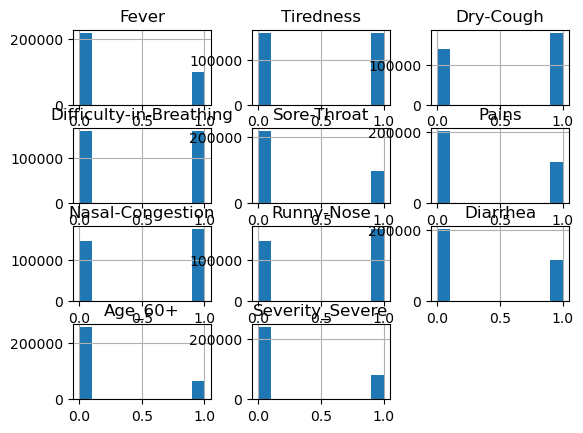

In [42]:
df3.hist()

In [44]:
train, test = train_test_split(df3, test_size = 0.3, random_state=0)

In [45]:
pred = test.copy()

In [46]:
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

In [47]:
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [48]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
//MODELO NAIVE BAYES//

GaussianNB()

In [49]:
y_pred_nb = model_nb.predict(x_test)

In [51]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



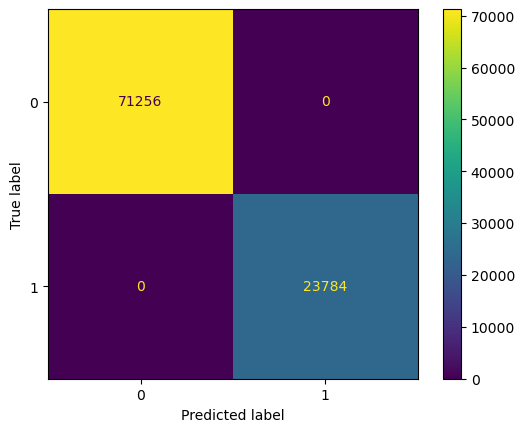

In [53]:
perform(y_pred_nb)

In [54]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040

